In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The aim for this project was to analyze the statistical properties of UCLA graduate school admissions dataset. 

The goal of the project is to build an interpretable model that can accurately predict if a student will be admitted to UCLA's graduate school. In addition, the project aims to find which variables are strong predictors of admission probability and if any variables are irrelevant when predicting admission. 


### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 

The dataset has 400 entries for UCLA applications and can be viewed in its csv format at: https://raw.githubusercontent.com/matthewmcnew/datascience-projects/master/admissions.csv. 

Four variables are available for analysis. GPA is continuous and represents the GPA of the student applying. GRE is continuous and represents the GRE test score of the student applying. The prestige has 4 values representing the relative prestige of applications' undergraduate university. A value of 1 represents a university of the highest prestige whereas, a value of 4 represents a university of the lowest prestige.  


Three entries in the dataset have missing values. These values have been dropped from the analysis due to their relative infrequency. 


### Demo: Provide a table that explains the data by admission status

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/matthewmcnew/datascience-projects/master/admissions.csv").dropna()


In [71]:
print df.groupby('admit')['gpa','gre'].agg([np.mean, np.std]).transpose()
print "\n"

def calc_frequency(df, name=''):
    total = float(len(df))
    number_admitted = df.admit.sum()
    percentage = number_admitted/total
    admitted = "{0} ({1:.2f}%)".format(number_admitted, 100*percentage)
    not_admitted = "{0} ({1:.2f}%)".format(int(total - number_admitted), 100*(1-percentage))
    return "{} | {} | {}".format(name, not_admitted, admitted)                                       
    
print calc_frequency(df[df.prestige ==1], 'Prestige 1')
print calc_frequency(df[df.prestige ==2], 'Prestige 2')
print calc_frequency(df[df.prestige ==3], 'Prestige 3')
print calc_frequency(df[df.prestige ==4], 'Prestige 4')

admit              0           1
gpa mean    3.347159    3.489206
    std     0.376355    0.371655
gre mean  573.579336  618.571429
    std   116.052798  109.257233


Prestige 1 | 28 (45.90%) | 33 (54.10%)
Prestige 2 | 95 (64.19%) | 53 (35.81%)
Prestige 3 | 93 (76.86%) | 28 (23.14%)
Prestige 4 | 55 (82.09%) | 12 (17.91%)


Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean: 3.347159 <br> std: 0.376355  | mean: 3.489206 <br> std: 0.371655
GRE | mean: 573.579336 <br> std: 116.052798 | mean: 618.571429 <br> std: 109.257233
Prestige 1 | 28 (45.90%) | 33 (54.10%)
Prestige 2 | 95 (64.19%) | 53 (35.81%)
Prestige 3 | 93 (76.86%) | 28 (23.14%)
Prestige 4 | 55 (82.09%) | 12 (17.91%)

### Methods: Write up the methods used in your analysis

Answer:

Initial exploratory analysis used charts to visualize the variables in the dataset. Exploratory statistics were utilized to detect any anomalies and ensure that the data was a good fit for logistic regression. Correlation coefficients were calculated to detect possible multicollinear variables. This was accomplished with pandas and matplotlib. 

A logistic regression model was calculated to predict admission probability. The inputs for the logistic regression were GPA, GRE, and three 'dummy' variables for prestiges 2-4. Prestige 1 was used as as a baseline and left out. The python statsmodels package was used to calculate the model. 


### Results: Write up your results

Answer:

GPA and GRE were close to a normal distribution, and there were no high correlation coefficients in the dataset. This meant that the data was a good candidate for logistic regression. 

The logistic regression model outputted positive coefficients with relatively low p values for GPA and GRE. Therefore there is a strong likelihood that an increase in GPA or GRE will increase the probability of admission.

The model outputted negative coefficients with relatively low p values for dummy variables corresponding with prestiges of 2, 3 or 4. Therefore there is a strong likelihood that applications from universities of lower prestiges have a lower probability of admission.

An easy way to interpret the model is by the studying the odds ratios of the coefficients. The odds ratio can be obtained by taking the inverse natural log (e^x) of the coefficent. For example, the odds ratio of GPA is (e^0.7793)= 2.18. This corresponds to an 118% increase in odds of admission for every 1 point increase in GPA. The odds ratio of the prestige 2 variable indicator is 0.506. This indicates that there is an approximately 50% decrease in the odds if an applicant applies from a University of prestige 2. There is a 74% and 79% decrease in the odds with applications from Universities of prestige 3 and 4, respectively. 

The odds of GRE is a bit trickier to interpret due the large variation in the dataset. The coefficient for GRE is 0.0022. For a 100 point increase in GRE the odds ratio would equal: e^(100*0.0022) = 1.24. This would result in a 24% increase in the odds of admission. 

### Visuals: Provide a table or visualization of these results

#### Distribution of Variables:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11604ab50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11672d1d0>]], dtype=object)

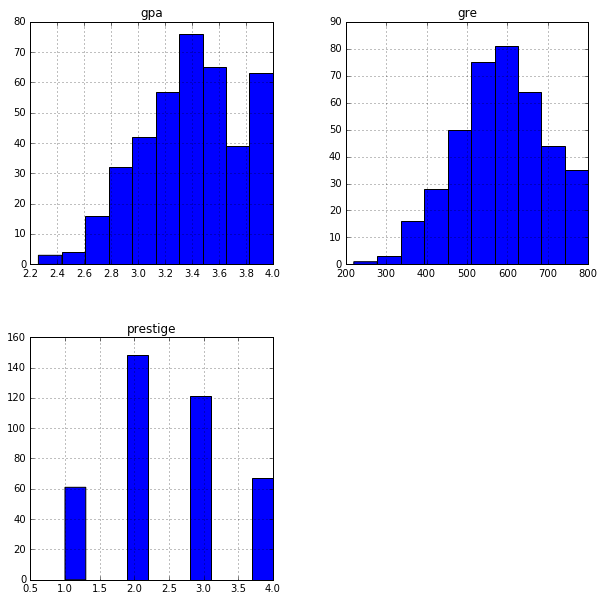

In [88]:
%matplotlib inline
df[['gpa','gre','prestige']].hist(figsize=(10,10))

#### Logistic Regression Summary:

In [12]:
import statsmodels.api as sm
# df = df.join(pd.get_dummies(df.prestige, prefix="prestige"))
df['intercept'] = 1.0
train_cols = ['intercept', 'gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
model = sm.Logit(df['admit'], df[train_cols])
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 02 May 2016   Pseudo R-squ.:                 0.08166
Time:                        22:24:54   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
================================================================================
"""

In [35]:
def cartesian(arrays, out=None):
    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

gres = np.linspace(df['gre'].min(), df['gre'].max(), 10)
gpas = np.linspace(df['gpa'].min(), df['gpa'].max(), 10)
prestiges = [1, 2, 3, 4]
intercept = [1.]
combos = pd.DataFrame(cartesian([gres, gpas, prestiges, intercept]), columns = ['gre', 'gpa', 'prestige', 'intercept'])
combos = combos.join(pd.get_dummies(combos.prestige, prefix="prestige"))
combos['prob_of_admission'] = result.predict(combos[train_cols])

# def add_line_for(prestige, variable):
#     variables = combos[combos.prestige == prestige].groupby(variable).mean().index
#     props = combos[combos.prestige == prestige].groupby(variable).mean()['prob_of_admission']
#     plt.plot(variables, props)

#### Visualizations of Predicted Probability from Logistic Regression:

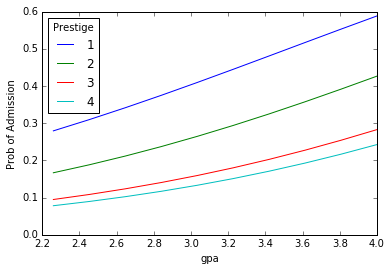

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

add_line_for(prestige=1, variable='gpa')
add_line_for(prestige=2, variable='gpa')
add_line_for(prestige=3, variable='gpa')
add_line_for(prestige=4, variable='gpa')

plt.xlabel('gpa')
plt.ylabel("Prob of Admission")
plt.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
plt.show()

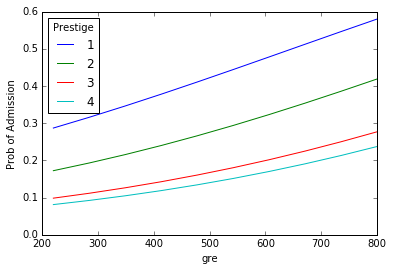

In [39]:
add_line_for(prestige=1, variable='gre')
add_line_for(prestige=2, variable='gre')
add_line_for(prestige=3, variable='gre')
add_line_for(prestige=4, variable='gre')

plt.xlabel('gre')
plt.ylabel("Prob of Admission")
plt.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
plt.show()

### Discussion: Write up your discussion and future steps

Answer: 

The logistic regression model captures the effect of the input variables in an easily interpretable manner. As demonstrated in the visualization above, there is a clear predicted increase in admission probability with higher GPAs, GREs and prestige of applicant’s university. In addition, the coefficients for the logistic regression model have very low p-values. This indicates that there is a high probability that these variables do have an influence on the probability of admission. This is valuable information that can be used and expanded in future studies. 

The next steps in analysis would be splitting the model into a testing and training sets to get a more accurate picture of the accuracy of the model. This accuracy could be improved by attempting regularization using cross validation. Regularization may help increase the accuracy of the model, however other techniques may provide even more accurate predictions. In the future, some of these other techniques such as decision trees and support vector machines will be studied.